### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [9]:
cotacoes_carteira = pd.DataFrame()

cotacoes_carteira['BOVA11'] = web.DataReader('BOVA11.SA', data_source='yahoo', start='2020-01-01', end='2020-11-10')

        # .SA foi adicionado por ser o nome do ativo no yahoo, .sa é comum pra os ativos brasileiros
display(cotacoes_carteira)

ValueError: Expected a 1D array, got an array with shape (215, 6)

In [8]:
# o erro é pq o "web.DataReader('BOVA11.SA', data_source='yahoo', start='2020-01-01', end='2020-11-10')"
# retornar um dataframe inteiro
web.DataReader('BOVA11.SA', data_source='yahoo', start='2020-01-01', end='2020-11-10')

# por tentar inserir essa informação em uma coluna , acaba que dá um erro

#para coorrigir, basta pegarmos só uma coluna desse dataFrame, que é a do nosso interesse 'Adj Close'

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,114.239998,112.129997,112.449997,114.239998,5684380,114.239998
2020-01-03,114.500000,112.800003,112.930000,113.800003,6602450,113.800003
2020-01-06,113.449997,112.019997,113.000000,112.589996,6771940,112.589996
2020-01-07,112.900002,111.589996,112.900002,112.239998,6096900,112.239998
2020-01-08,113.099998,111.400002,112.650002,111.949997,6472610,111.949997
...,...,...,...,...,...,...
2020-11-04,94.629997,92.849998,93.510002,94.160004,12844442,94.160004
2020-11-05,97.169998,95.379997,95.769997,96.949997,12692233,96.949997
2020-11-06,97.339996,96.089996,96.089996,97.190002,8765724,97.190002


In [30]:
cotacoes_carteira = pd.DataFrame()
cotacoes_carteira['BOVA11'] = web.DataReader('BOVA11.SA', data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']
display(cotacoes_carteira)

,BOVA11
Date,
2020-01-02,114.239998
2020-01-03,113.800003
2020-01-06,112.589996
2020-01-07,112.239998
2020-01-08,111.949997
...,...
2020-11-04,94.160004
2020-11-05,96.949997
2020-11-06,97.190002


In [59]:
# Faremos um for pra buscar todos os dados de uma vez.

for ativo in carteira['Ativos']:
    print(ativo)
    cotacoes_carteira[ativo] = web.DataReader(f'{ativo}.SA', data_source='yahoo', start='2020-01-01', end='2020-11-10')['Adj Close']

display(cotacoes_carteira)

BOVA11
SMAL11
MGLU3
BBDC4
ITUB4
ENEV3
MOVI3
BPAC11
NTCO3
BCRI11
VILG11
KNRI11
XPLG11


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,25.794867,35.588448,10.9650,17.875837,18.235773,38.093487,123.043831,146.925858,195.954880,NaN
2020-01-03,113.800003,140.899994,11.922435,25.807922,35.214130,11.0675,18.350580,18.288694,40.747009,124.516182,144.953705,195.954880,NaN
2020-01-06,112.589996,139.100006,11.932189,25.346947,34.690086,11.3500,18.418339,18.262234,39.882378,123.541115,146.491989,194.364441,NaN
2020-01-07,112.239998,139.399994,11.898049,24.906603,33.885277,11.2650,18.381575,18.335094,40.528366,123.706879,141.827835,195.120361,NaN
2020-01-08,111.949997,138.199997,12.263844,24.521313,33.333172,11.2125,18.473480,18.172602,40.737072,121.464226,137.528519,184.075821,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.818973,23.926958,14.4000,17.039717,18.344759,47.375851,104.819809,125.202530,155.487625,125.046341
2020-11-05,96.949997,115.900002,27.401571,16.063749,24.491629,14.6775,18.032322,19.155306,49.969746,104.819809,126.592911,155.291260,125.340195
2020-11-06,97.190002,117.510002,27.281780,16.025507,24.462921,14.7925,18.592960,19.365269,50.317589,104.673553,126.247772,155.546539,127.338440


### Será que todos os dados vieram corretos?

In [61]:
cotacoes_carteira['XPLG11'].head(106).info()  # os 105 primeiros valores desse ativo não existem, pode ser um indicativo
 # de que ele tenha sido criado posterior a essa data.

<class 'pandas.core.series.Series'>
DatetimeIndex: 106 entries, 2020-01-02 to 2020-06-04
Series name: XPLG11
Non-Null Count  Dtype  
--------------  -----  
1 non-null      float64
dtypes: float64(1)
memory usage: 1.7 KB


### Ajustando os dados

#### Pela Média

In [49]:
# uma forma de ajuste é ajustar pela média
df_media = cotacoes_carteira.mean() # retorna a média de cada coluna
cotacoes_carteira = cotacoes_carteira.fillna(df_media) #preenche os valores NA com a média
display(cotacoes_carteira)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029736,25.794870,35.588451,10.9650,17.875837,18.235773,38.093487,123.043831,146.925858,195.954865,124.721406
2020-01-03,113.800003,140.899994,11.922435,25.807920,35.214127,11.0675,18.350578,18.288696,40.747009,124.516174,144.953705,195.954865,124.721406
2020-01-06,112.589996,139.100006,11.932188,25.346937,34.690083,11.3500,18.418337,18.262234,39.882378,123.541107,146.491989,194.364441,124.721406
2020-01-07,112.239998,139.399994,11.898048,24.906603,33.885300,11.2650,18.381571,18.335094,40.528366,123.706886,141.827835,195.120377,124.721406
2020-01-08,111.949997,138.199997,12.263843,24.521315,33.333168,11.2125,18.473478,18.172600,40.737072,121.464226,137.528519,184.075821,124.721406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.818972,23.926958,14.4000,17.039717,18.344759,47.375851,104.819809,125.202530,155.487625,125.046341
2020-11-05,96.949997,115.900002,27.401571,16.063755,24.491638,14.6775,18.032322,19.155306,49.969746,104.819809,126.592911,155.291275,125.340195
2020-11-06,97.190002,117.510002,27.281780,16.025507,24.462919,14.7925,18.592960,19.365267,50.317589,104.673553,126.247772,155.546539,127.338440


#### Com o valor anterior

In [62]:
# outra maneira é preencher com o valor anterior
cotacoes_carteira = cotacoes_carteira.ffill()
cotacoes_carteira.info()
display(cotacoes_carteira)

# esse método nao foi funcional, pois não existem dados anteriores ao dia 02/01/2020

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  110 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,25.794867,35.588448,10.9650,17.875837,18.235773,38.093487,123.043831,146.925858,195.954880,NaN
2020-01-03,113.800003,140.899994,11.922435,25.807922,35.214130,11.0675,18.350580,18.288694,40.747009,124.516182,144.953705,195.954880,NaN
2020-01-06,112.589996,139.100006,11.932189,25.346947,34.690086,11.3500,18.418339,18.262234,39.882378,123.541115,146.491989,194.364441,NaN
2020-01-07,112.239998,139.399994,11.898049,24.906603,33.885277,11.2650,18.381575,18.335094,40.528366,123.706879,141.827835,195.120361,NaN
2020-01-08,111.949997,138.199997,12.263844,24.521313,33.333172,11.2125,18.473480,18.172602,40.737072,121.464226,137.528519,184.075821,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.818973,23.926958,14.4000,17.039717,18.344759,47.375851,104.819809,125.202530,155.487625,125.046341
2020-11-05,96.949997,115.900002,27.401571,16.063749,24.491629,14.6775,18.032322,19.155306,49.969746,104.819809,126.592911,155.291260,125.340195
2020-11-06,97.190002,117.510002,27.281780,16.025507,24.462921,14.7925,18.592960,19.365269,50.317589,104.673553,126.247772,155.546539,127.338440


In [80]:
# Como aparentemente os 105 primeiros valores não existem, oa tivo pode ter sido criado depois do início da pesquisa
# então será preenchido com o valor 0 no ativo XPLG11
cotacoes_carteira = cotacoes_carteira.fillna(0)
cotacoes_carteira.info()
display(cotacoes_carteira)

# esse método nao foi funcional, pois não existem dados anteriores ao dia 02/01/2020

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2020-01-02 to 2020-11-10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  215 non-null    float64
 1   SMAL11  215 non-null    float64
 2   MGLU3   215 non-null    float64
 3   BBDC4   215 non-null    float64
 4   ITUB4   215 non-null    float64
 5   ENEV3   215 non-null    float64
 6   MOVI3   215 non-null    float64
 7   BPAC11  215 non-null    float64
 8   NTCO3   215 non-null    float64
 9   BCRI11  215 non-null    float64
 10  VILG11  215 non-null    float64
 11  KNRI11  215 non-null    float64
 12  XPLG11  215 non-null    float64
dtypes: float64(13)
memory usage: 23.5 KB


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,25.794867,35.588448,10.9650,17.875837,18.235773,38.093487,123.043831,146.925858,195.954880,0.000000
2020-01-03,113.800003,140.899994,11.922435,25.807922,35.214130,11.0675,18.350580,18.288694,40.747009,124.516182,144.953705,195.954880,0.000000
2020-01-06,112.589996,139.100006,11.932189,25.346947,34.690086,11.3500,18.418339,18.262234,39.882378,123.541115,146.491989,194.364441,0.000000
2020-01-07,112.239998,139.399994,11.898049,24.906603,33.885277,11.2650,18.381575,18.335094,40.528366,123.706879,141.827835,195.120361,0.000000
2020-01-08,111.949997,138.199997,12.263844,24.521313,33.333172,11.2125,18.473480,18.172602,40.737072,121.464226,137.528519,184.075821,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,94.160004,112.000000,26.143793,15.818973,23.926958,14.4000,17.039717,18.344759,47.375851,104.819809,125.202530,155.487625,125.046341
2020-11-05,96.949997,115.900002,27.401571,16.063749,24.491629,14.6775,18.032322,19.155306,49.969746,104.819809,126.592911,155.291260,125.340195
2020-11-06,97.190002,117.510002,27.281780,16.025507,24.462921,14.7925,18.592960,19.365269,50.317589,104.673553,126.247772,155.546539,127.338440


### Vamos ver como que as ações foram individualmente

Como a variação de cada carteira pode variar devido o valor absoluto de cada uma, é necessário normalizar os valores para que eles sejam comparados de forma mais fiel, 

a forma de fazer isso é dividindo todos os valores pelo primeiro valor de cada ativo.

No caso do XPLG11 que não existe um valor inicial, e foi modificado para zero, quando for dividido por zero, apresentará um erro, então terá que ser tratado de forma diferente


In [76]:
print(cotacoes_carteira.iloc[:,:-1]) # seleciona todas as colunas, menos a ultima (XPLG11)

                BOVA11      SMAL11      MGLU3      BBDC4      ITUB4    ENEV3  \
Date                                                                           
2020-01-02  114.239998  139.500000  12.029735  25.794867  35.588448  10.9650   
2020-01-03  113.800003  140.899994  11.922435  25.807922  35.214130  11.0675   
2020-01-06  112.589996  139.100006  11.932189  25.346947  34.690086  11.3500   
2020-01-07  112.239998  139.399994  11.898049  24.906603  33.885277  11.2650   
2020-01-08  111.949997  138.199997  12.263844  24.521313  33.333172  11.2125   
...                ...         ...        ...        ...        ...      ...   
2020-11-04   94.160004  112.000000  26.143793  15.818973  23.926958  14.4000   
2020-11-05   96.949997  115.900002  27.401571  16.063749  24.491629  14.6775   
2020-11-06   97.190002  117.510002  27.281780  16.025507  24.462921  14.7925   
2020-11-09   99.500000  120.000000  26.403336  17.547741  26.444075  14.3950   
2020-11-10  101.000000  119.169998  25.1

In [93]:
carteira_norm = cotacoes_carteira.iloc[:,:-1] / cotacoes_carteira.iloc[0]
display(carteira_norm)
# falta apenas normalizar e inserir o XPLG11

,BBDC4,BCRI11,BOVA11,BPAC11,ENEV3,ITUB4,KNRI11,MGLU3,MOVI3,NTCO3,SMAL11,VILG11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
2020-01-03,1.000506,1.011966,0.996149,1.002902,1.009348,0.989482,1.000000,0.991080,1.026558,1.069658,1.010036,0.986577,NaN
2020-01-06,0.982635,1.004042,0.985557,1.001451,1.035112,0.974757,0.991884,0.991891,1.030348,1.046961,0.997133,0.997047,NaN
2020-01-07,0.965564,1.005389,0.982493,1.005447,1.027360,0.952143,0.995741,0.989053,1.028292,1.063919,0.999283,0.965302,NaN
2020-01-08,0.950628,0.987162,0.979954,0.996536,1.022572,0.936629,0.939379,1.019461,1.033433,1.069397,0.990681,0.936040,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,0.613260,0.851890,0.824230,1.005976,1.313269,0.672324,0.793487,2.173264,0.953226,1.243673,0.802867,0.852148,NaN
2020-11-05,0.622750,0.851890,0.848652,1.050425,1.338577,0.688190,0.792485,2.277820,1.008754,1.311766,0.830824,0.861611,NaN
2020-11-06,0.621267,0.850701,0.850753,1.061938,1.349065,0.687384,0.793788,2.267862,1.040117,1.320897,0.842366,0.859262,NaN


In [94]:
print(cotacoes_carteira['XPLG11'][100:108])
# inicia a cotação na linha de índice 105
cotacoes_carteira['XPLG11'][105]

carteira_norm['XPLG11'] = cotacoes_carteira['XPLG11'] / cotacoes_carteira['XPLG11'][105]
carteira_norm

Date
2020-05-28      0.000000
2020-05-29      0.000000
2020-06-01      0.000000
2020-06-02      0.000000
2020-06-03      0.000000
2020-06-04    113.243050
2020-06-05    114.957214
2020-06-08    116.073875
Name: XPLG11, dtype: float64


,BBDC4,BCRI11,BOVA11,BPAC11,ENEV3,ITUB4,KNRI11,MGLU3,MOVI3,NTCO3,SMAL11,VILG11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2020-01-03,1.000506,1.011966,0.996149,1.002902,1.009348,0.989482,1.000000,0.991080,1.026558,1.069658,1.010036,0.986577,0.000000
2020-01-06,0.982635,1.004042,0.985557,1.001451,1.035112,0.974757,0.991884,0.991891,1.030348,1.046961,0.997133,0.997047,0.000000
2020-01-07,0.965564,1.005389,0.982493,1.005447,1.027360,0.952143,0.995741,0.989053,1.028292,1.063919,0.999283,0.965302,0.000000
2020-01-08,0.950628,0.987162,0.979954,0.996536,1.022572,0.936629,0.939379,1.019461,1.033433,1.069397,0.990681,0.936040,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,0.613260,0.851890,0.824230,1.005976,1.313269,0.672324,0.793487,2.173264,0.953226,1.243673,0.802867,0.852148,1.104230
2020-11-05,0.622750,0.851890,0.848652,1.050425,1.338577,0.688190,0.792485,2.277820,1.008754,1.311766,0.830824,0.861611,1.106825
2020-11-06,0.621267,0.850701,0.850753,1.061938,1.349065,0.687384,0.793788,2.267862,1.040117,1.320897,0.842366,0.859262,1.124470


<AxesSubplot:xlabel='Date'>

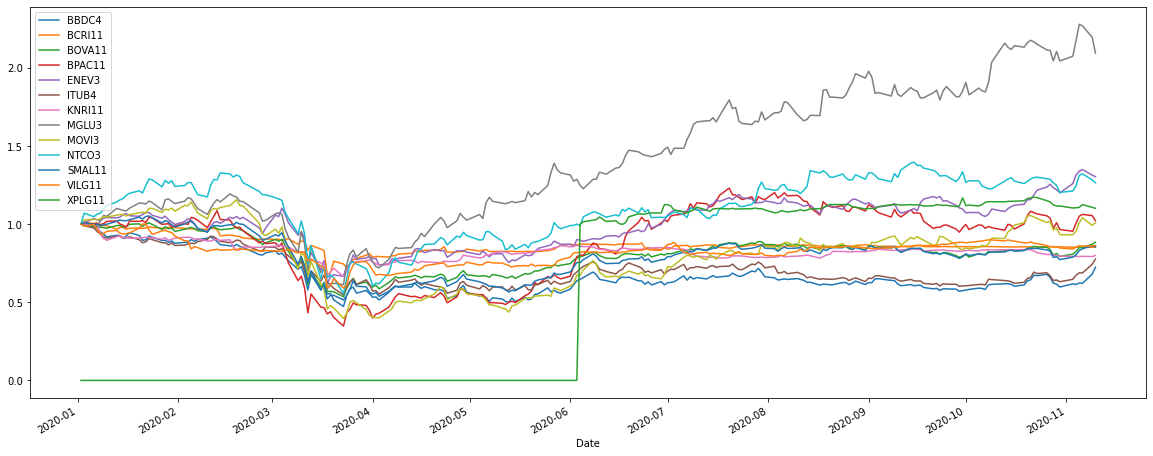

In [95]:
carteira_norm.plot(figsize=(20,8))

### Vamos puxar o IBOV para comparar

In [96]:
cotacao_ibov = web.DataReader('^BVSP', data_source='yahoo', start='2020-01-01', end='2020-11-10')
cotacao_ibov

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573,115649,115652,118573,5162700,118573
2020-01-03,118792,117341,118564,117707,6834500,117707
2020-01-06,117707,116269,117707,116878,6570000,116878
2020-01-07,117076,115965,116872,116662,4854100,116662
2020-01-08,117335,115693,116667,116247,5910500,116247
...,...,...,...,...,...,...
2020-11-04,98296,95987,95992,97811,10704600,97811
2020-11-05,100922,97872,97873,100774,10455300,100774
2020-11-06,100928,99837,100751,100799,8382800,100799


### Criando um dataframe da Carteira com as quantidades de ações

In [98]:
# é necessário pegar as quantidades do data frame de carteira
# carteira.loc[linha, coluna]
carteira.loc[carteira['Ativos']=='MGLU3', 'Qtde']

2    1000
Name: Qtde, dtype: int64

In [99]:
# para pega o valor de um data frame com um único item, pode ser usador .values[0]
carteira.loc[carteira['Ativos']=='MGLU3', 'Qtde'].values[0]

1000

Para cada ativo, usaremos o for para percorrer e mudar o nome de cada ativo

In [100]:
valor_investido = pd.DataFrame()

for ativo in carteira['Ativos']:
    valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
    
display(valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2579.486656,3558.844757,3289.500046,1787.583733,1823.577309,3809.348679,12304.383087,14692.585754,19595.487976,0.000000
2020-01-03,11380.000305,14089.999390,11922.434807,2580.792236,3521.413040,3320.250034,1835.058022,1828.869438,4074.700928,12451.618195,14495.370483,19595.487976,0.000000
2020-01-06,11258.999634,13910.000610,11932.188988,2534.694672,3469.008636,3405.000114,1841.833878,1826.223373,3988.237762,12354.111481,14649.198914,19436.444092,0.000000
2020-01-07,11223.999786,13939.999390,11898.049355,2490.660286,3388.527679,3379.500103,1838.157463,1833.509445,4052.836609,12370.687866,14182.783508,19512.036133,0.000000
2020-01-08,11194.999695,13819.999695,12263.843536,2452.131271,3333.317184,3363.749886,1847.348022,1817.260170,4073.707199,12146.422577,13752.851868,18407.582092,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1581.897259,2392.695808,4319.999886,1703.971672,1834.475899,4737.585068,10481.980896,12520.252991,15548.762512,12504.634094
2020-11-05,9694.999695,11590.000153,27401.571274,1606.374931,2449.162865,4403.249931,1803.232193,1915.530586,4996.974564,10481.980896,12659.291077,15529.125977,12534.019470
2020-11-06,9719.000244,11751.000214,27281.780243,1602.550697,2446.292114,4437.749863,1859.296036,1936.526871,5031.758881,10467.355347,12624.777222,15554.653931,12733.843994


### Comparação Carteira x IBOV

In [102]:
# valor_investido['Total'] = valor_investido.sum() #soma as colunas

# queremos somar as linhas
valor_investido['Total'] = valor_investido.sum(axis=1) 
valor_investido

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2579.486656,3558.844757,3289.500046,1787.583733,1823.577309,3809.348679,12304.383087,14692.585754,19595.487976,0.000000,201689.064789
2020-01-03,11380.000305,14089.999390,11922.434807,2580.792236,3521.413040,3320.250034,1835.058022,1828.869438,4074.700928,12451.618195,14495.370483,19595.487976,0.000000,202191.989708
2020-01-06,11258.999634,13910.000610,11932.188988,2534.694672,3469.008636,3405.000114,1841.833878,1826.223373,3988.237762,12354.111481,14649.198914,19436.444092,0.000000,201211.884308
2020-01-07,11223.999786,13939.999390,11898.049355,2490.660286,3388.527679,3379.500103,1838.157463,1833.509445,4052.836609,12370.687866,14182.783508,19512.036133,0.000000,200221.495247
2020-01-08,11194.999695,13819.999695,12263.843536,2452.131271,3333.317184,3363.749886,1847.348022,1817.260170,4073.707199,12146.422577,13752.851868,18407.582092,0.000000,196946.426392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,9416.000366,11200.000000,26143.793106,1581.897259,2392.695808,4319.999886,1703.971672,1834.475899,4737.585068,10481.980896,12520.252991,15548.762512,12504.634094,228772.099113
2020-11-05,9694.999695,11590.000153,27401.571274,1606.374931,2449.162865,4403.249931,1803.232193,1915.530586,4996.974564,10481.980896,12659.291077,15529.125977,12534.019470,234131.027222
2020-11-06,9719.000244,11751.000214,27281.780243,1602.550697,2446.292114,4437.749863,1859.296036,1936.526871,5031.758881,10467.355347,12624.777222,15554.653931,12733.843994,234893.171310


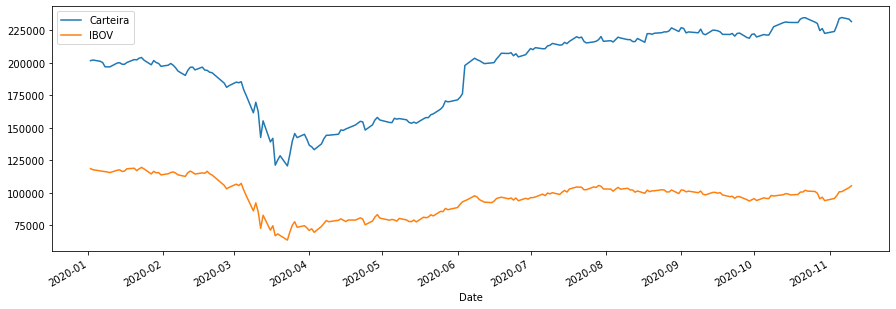

In [105]:
valor_investido['Total'].plot(figsize=(15,5), label ='Carteira')
cotacao_ibov['Adj Close'].plot(figsize=(15,5), label='IBOV')
plt.legend()
plt.show()

# nota-se que os gráficos tem valores muito diferentes e fica difícil vizualizar
# entao iremos normalizar 

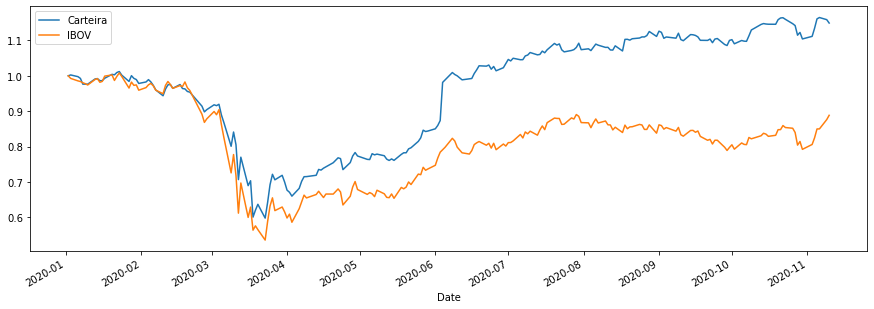

In [107]:
valor_investido_norm = valor_investido / valor_investido.iloc[0]
cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

valor_investido_norm['Total'].plot(figsize=(15,5), label ='Carteira')
cotacao_ibov_norm['Adj Close'].plot(figsize=(15,5), label='IBOV')
plt.legend()
plt.show()


In [109]:
retorno_carteira = valor_investido['Total'][-1] / valor_investido['Total'][0] - 1
retorno_ibov = cotacao_ibov['Adj Close'][-1] / cotacao_ibov['Adj Close'][0] - 1 
print(f'Retorno da Carteira foi {retorno_carteira:.2%}')
print(f'Retorno da IBOV foi {retorno_ibov:.2%}')

Retorno da Carteira foi 14.90%
Retorno da IBOV foi -11.15%


### Correlação da Carteira com o IBOV

In [112]:
correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
print(correlacao)

0.705492152309255
